In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
#Read the dataset from drive and store in var df
df = pd.read_csv('/content/Dataset.csv')

In [ ]:
print(df['Rating text'])

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object


# Level 3

## Task 1: Restaurant Reviews

Q1. Analyze the text reviews to identify the most common positive and negative keywords.

In [ ]:
positive_data = df.loc[df['Aggregate rating'] >= 2.5]
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [ ]:
positive_keywords = positive_data['Rating text'].unique()
print(positive_keywords)

['Excellent' 'Very Good' 'Good' 'Average']


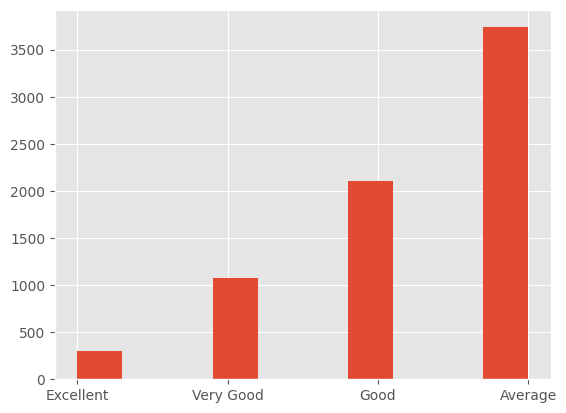

In [ ]:
plt.hist(positive_data['Rating text'], label=positive_keywords)
plt.show()

In [ ]:
negative_data = df.loc[(df['Aggregate rating'] < 2.5) & (df['Aggregate rating'] > 0)]
# print(negative_data)
negative_keywords = negative_data['Rating text'].unique()
print(negative_keywords)

['Poor']


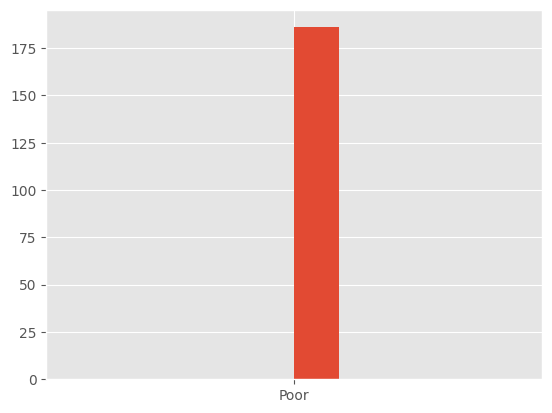

In [ ]:
plt.hist(negative_data['Rating text'], label=negative_keywords)
plt.show()

Q2. Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [ ]:
# Create review length column from Rating text
df['review_len'] = df['Rating text'].astype(str).apply(len)

# Average review length
avg_len = df['review_len'].mean()
print("Average review length:", avg_len)

# Correlation between review length and rating
corr = df['review_len'].corr(df['Aggregate rating'])
print("Correlation:", corr)

Average review length: 7.020730813527379
Correlation: -0.4788848381349333


## Task 2: Votes Analysis

Q1. Identify the restaurants with the highest and
lowest number of votes.

In [ ]:
Highest_voted_restaurant = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)
Highest_voted_restaurant = Highest_voted_restaurant.idxmax()
print("The Highest Voted Restaurant is :",Highest_voted_restaurant)

The Highest Voted Restaurant is : Barbeque Nation


In [ ]:
lowest_rated_restaurant = df.groupby('Restaurant Name')['Votes'].sum().sort_values()
lowest_rated_restaurant = lowest_rated_restaurant.idxmin()
print("The Lowest Voted Restaurant is :",lowest_rated_restaurant)

The Lowest Voted Restaurant is : Breaky2Dinner


Q2. Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [ ]:
corelation=np.corrcoef(df['Votes'],df['Aggregate rating'])
corelation=np.round(corelation,2)
print(corelation)

[[1.   0.31]
 [0.31 1.  ]]


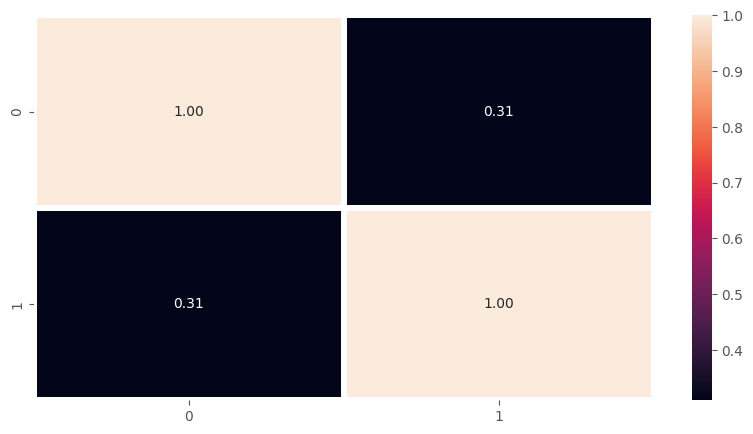

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(corelation, annot=True, fmt=".2f", linewidth=4)
plt.show()

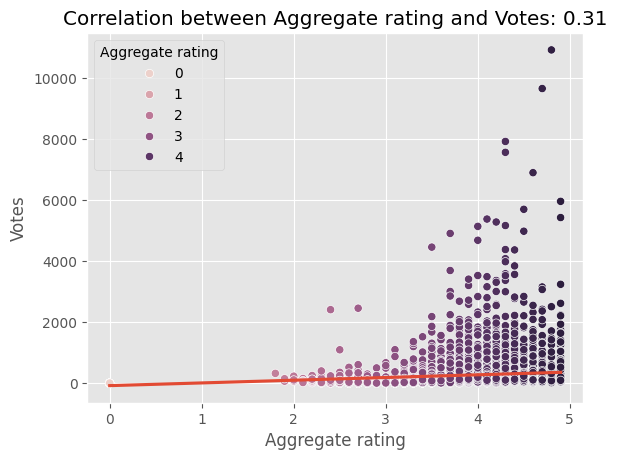

As per result corelation value = 0.31, which indicates there is a moderate positive corelation between these two variables.


In [ ]:
sns.scatterplot(data=df, y= 'Votes' , hue = 'Aggregate rating', x = 'Aggregate rating')
sns.regplot(data=df, y= 'Votes' , x = 'Aggregate rating', scatter=False)
plt.title("Correlation between Aggregate rating and Votes: 0.31")
plt.show()
print("As per result corelation value = 0.31, which indicates there is a moderate positive corelation between these two variables.")

## Task 3: Price Range vs. Online Delivery and Tables Booking

Q1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [ ]:
x1 = df['Has Online delivery']
y = df['Average Cost for two']
x2 = df['Has Table booking']


To analyze this task we need to plot 2 charts together

a) Plot 1 for Online Delivery with the avg cost

b) Plot 2 for Table booking with the avg cost

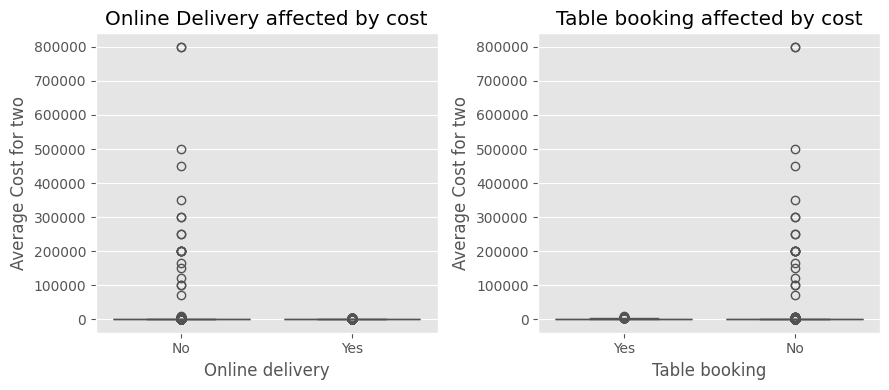

In [ ]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y=y)
plt.xlabel('Online delivery')
plt.ylabel('Average Cost for two')
plt.title('Online Delivery affected by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2, y=y)
plt.xlabel('Table booking')
plt.ylabel('Average Cost for two')
plt.title('Table booking affected by cost')
plt.tight_layout()
plt.show()

In [ ]:
print(" Both the Online delivery and Table booking negaively impacted by the cost")

 Both the Online delivery and Table booking negaively impacted by the cost


Q2. Determine if higher-priced restaurants are
more likely to offer these services.

In [ ]:
print("High priced Restaurants which have average cost more than 10,000 did not provide Online delivery as well as Table Booking facilities")

High priced Restaurants which have average cost more than 10,000 did not provide Online delivery as well as Table Booking facilities


Checking for the restaurants have avg cost less than 10,000

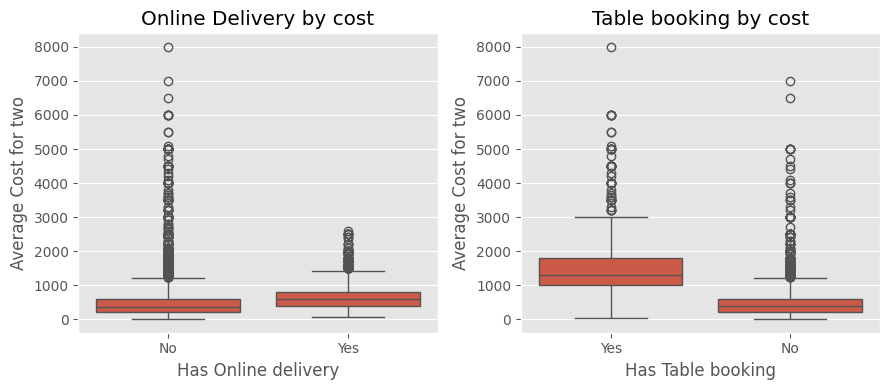

In [ ]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y='Average Cost for two', data=df.loc[df['Average Cost for two'] < 10000])
plt.title('Online Delivery by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2, y='Average Cost for two', data=df.loc[df['Average Cost for two'] < 10000])
plt.title('Table booking by cost')
plt.tight_layout()
plt.show()

In [ ]:
print(" The Online delivery facility is present for only those restaurants, where the avg cost is less than 1000. ")
print(" The Table booking facility is available in restaurants with an average cost ranging from 1000 to 2000. ")

 The Online delivery facility is present for only those restaurants, where the avg cost is less than 1000. 
 The Table booking facility is available in restaurants with an average cost ranging from 1000 to 2000. 
